# Implementation N1 of an Image Classfication Model

In [69]:
# Import the necessary libraries:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential# used for the model

In [70]:
# import the data from kaggle:
import opendatasets as od
import pandas

#large-image-dataset
dataset_path = "./large-image-dataset/"#path to the data
#dataset_path = "./animal-image-dataset-90-different-animals/animals"

## Filter Data - Delete files that aren't images:

In [10]:
files = os.listdir(dataset_path)#gather the path:
#print(files)
for folder in files:
    folder_path = str(dataset_path+'/'+folder)
    images = os.listdir(folder_path)
    for i in (images):
        #split the data:
        extention = i.split(".")[1]
        #remove images with extra extentions:
        if(len(i.split(".")) > 2):
            os.remove(folder_path+'/'+str(i))
        if(extention not in ['jpeg','jpg','bmp','png']):
            try:
                os.remove(folder_path+'/'+str(i))
            except FileNotFoundError:
                print("file was not found")
            except PermissionError:
                print("Permission Error")
            else:
                print(folder_path+str(i)+" was deleted")
    

## Check the size of each folder and delete images if size exceeds:

In [41]:
files = os.listdir(dataset_path)#gather the path:
#loop through all the folders:
for folder in files:
    files_in_folder = os.listdir(dataset_path+'/'+str(folder))
    size = len(files_in_folder)
    if size != 250:print(str(folder), size)

In [42]:
import random
files = os.listdir(dataset_path)#gather the path:
#loop through all the folders:
for folder in files:
    files_in_folder = os.listdir(dataset_path+'/'+str(folder))
    size = len(files_in_folder)
    while(size > 250):
        deleted_index = random.randint(0,size)
        path_to_file = dataset_path+str(folder)+'/'+files_in_folder[deleted_index]
        print("Image deleted: "+path_to_file)
        try:
            os.remove(path_to_file)
        except:
            pass
        else:
            size = size-1
            

## Loading the data & Filter for a balanced dataset:

In [71]:
#Loading the Data in a faster and more efficient manner:
files = os.listdir(dataset_path)#gather the path:
#paths to the files
folder_path = os.path.join(dataset_path)#path to the images
#tf.keras.utils.image_dataset_from_directory??

data  = tf.keras.utils.image_dataset_from_directory(folder_path)
data_iterator = data.as_numpy_iterator()# like an iterator  in Java
batch = data_iterator.next()

batch[0].shape
print(batch[1].shape)



Found 5400 files belonging to 90 classes.
(32,)


In [44]:
tf.data.Dataset??

## Preprocessing:

In [72]:
data = data.map(lambda x,y: (x/255, y))# tf function map to rescale the images
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

[89  0  7 73 12 62 68 88 78 50 72 29 20 54 12 12 66 32 72 81 75 27 36 51
 51 35 70 77 72 77 77 52]


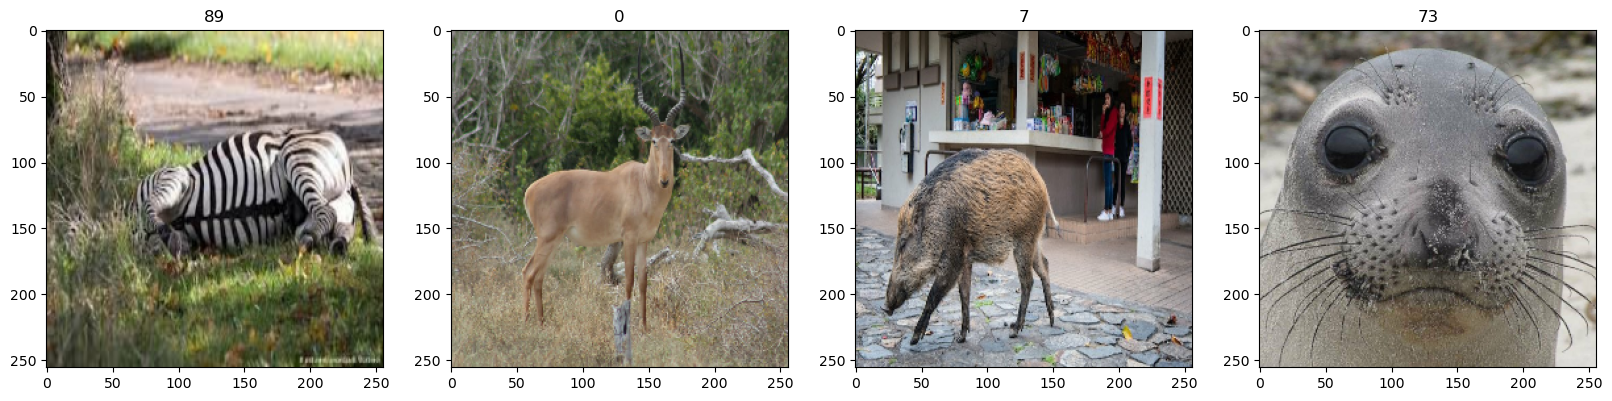

In [73]:
#visualise the data:
fig, axis = plt.subplots(ncols=4, figsize=(20, 20))
batch_images = batch[0][:4]
batch_labels = batch[1]
print(batch_labels)

for idx in range(4):
    axis[idx].imshow(batch_images[idx])
    axis[idx].title.set_text(batch_labels[idx])

In [74]:
batch[0].max()

#Split the data:
print(len(data))#169 batches of 32
#Size for each batch: (70% train, 15% validation, 15% test)
train_size = round(len(data) * 0.7)
validation_size = round((len(data) - train_size) / 2)
test_size = len(data) - train_size - validation_size
print(train_size,validation_size,test_size)

169
118 26 25


In [75]:
#Alocate the Batches to the data:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(validation_size)
test_data = data.skip(train_size+validation_size).take(test_size)

## Training the Network

In [76]:
#import the relative layers
from tensorflow.keras.models import Sequential# used for the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

In [77]:
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(90, activation='softmax'))

In [78]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    metrics=['accuracy']
)

In [80]:
history = model.fit(train_data, epochs=20, validation_data=val_data)

Epoch 1/20
 17/118 [===>..........................] - ETA: 17s - loss: 4.3623 - accuracy: 0.0312

KeyboardInterrupt: 

## Evaluating the Model

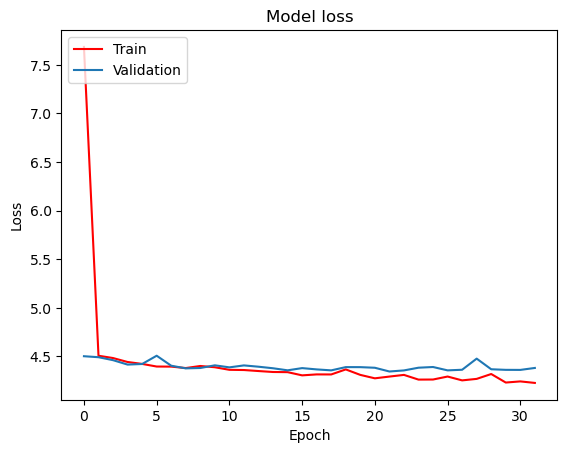

In [33]:
#plot the training process for the loss function:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')#loss func ploted
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

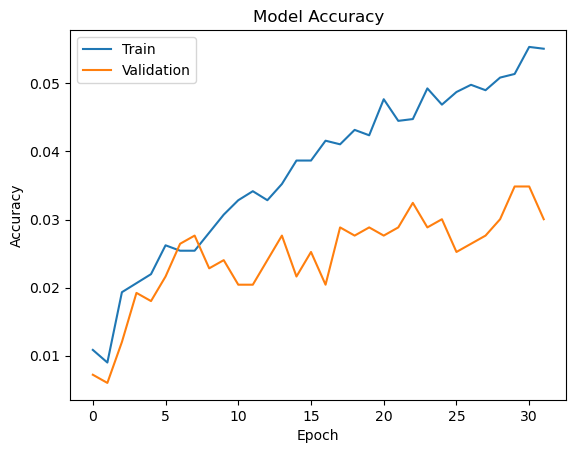

In [34]:
#plot the training process for the accuracy:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='upper left')

## Evaluate the Model On Test Data:

In [35]:
test_results = model.evaluate(test_data)

# Print the test accuracy and loss
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

25/25 [==============================] - 10s 48ms/step - loss: 4.4312 - accuracy: 0.0177
Test Loss: 4.431212425231934
Test Accuracy: 0.017676766961812973


# Adjustments to Model N1:

1. Adding more images

2. Play with the model (add/remove layers)

3. Filter Images for only images that a user can take